# Step 1: Import Required Libraries and Load the Data

In [1]:
import pandas as pd
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio
from sklearn.ensemble import IsolationForest
import numpy as np
pio.templates.default = "plotly_white"

In [2]:
# Load the data
data = pd.read_csv('Queries.csv')
data.head()

,Top queries,Clicks,Impressions,CTR,Position
0,number guessing game python,5223,14578,35.83%,1.61
1,thecleverprogrammer,2809,3456,81.28%,1.02
2,python projects with source code,2077,73380,2.83%,5.94
3,classification report in machine learning,2012,4959,40.57%,1.28
4,the clever programmer,1931,2528,76.38%,1.09


# Step 2: Initial Data Exploration

In [3]:
# Check the column names
print(data.columns)

Index(['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position'], dtype='str')


# Step 3: Data Preprocessing

In [4]:
# Convert CTR from percentage string to float
data['CTR'] = data['CTR'].str.rstrip('%').astype('float') / 100.0

# Step 4: Analyze Common Words in Search Queries

In [5]:
# Assuming the correct column name is 'Top queries', modify if needed based on your data.
def clean_and_split(query):
    query = re.sub(r'[^a-zA-Z\s]', '', query)  # Remove non-alphabetic characters
    return query.lower().split()

data['Cleaned_Words'] = data['Top queries'].apply(clean_and_split)

In [6]:
all_words = [word for words in data['Cleaned_Words'] for word in words]
word_freq = Counter(all_words)

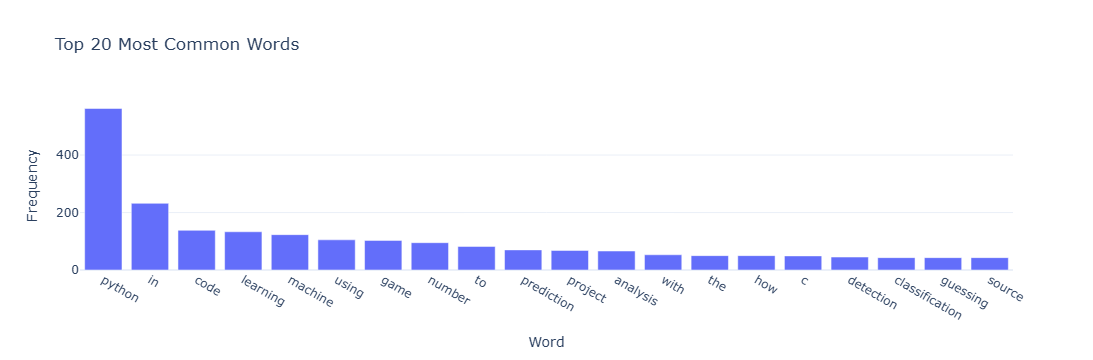

In [7]:
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
fig = px.bar(word_freq_df.head(20), x='Word', y='Frequency', title='Top 20 Most Common Words')
fig.show()

# Step 5: Analyze Top Queries by Clicks and Impressions

In [8]:
# Top Queries by Clicks
top_clicks = data.sort_values(by='Clicks', ascending=False).head(10)
print(top_clicks[['Top queries', 'Clicks']])

                                 Top queries  Clicks
0                number guessing game python    5223
1                        thecleverprogrammer    2809
2           python projects with source code    2077
3  classification report in machine learning    2012
4                      the clever programmer    1931
5        standard scaler in machine learning    1559
6                               aman kharwal    1490
7                python turtle graphics code    1455
8      python game projects with source code    1421
9        82 python projects with source code    1343


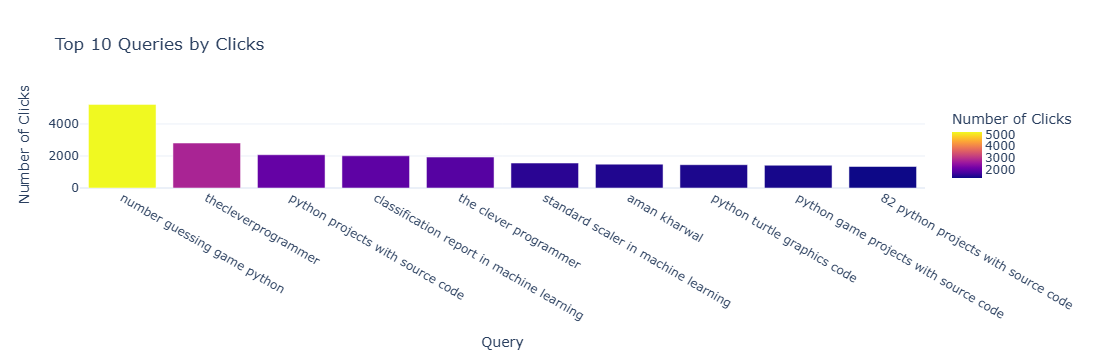

In [9]:
top_clicks = data.sort_values(by='Clicks', ascending=False).head(10)
fig_clicks = px.bar(top_clicks, x='Top queries', y='Clicks', 
                    title='Top 10 Queries by Clicks', 
                    labels={'Clicks':'Number of Clicks', 'Top queries':'Query'},
                    color='Clicks')
fig_clicks.show()

In [10]:
# Top Queries by Impressions
top_impressions = data.sort_values(by='Impressions', ascending=False).head(10)
print(top_impressions[['Top queries', 'Impressions']])

                          Top queries  Impressions
2    python projects with source code        73380
82                           r2 score        56322
34           machine learning roadmap        42715
21              classification report        39896
232                    standardscaler        39267
91     facebook programming languages        36055
15         rock paper scissors python        35824
36                  pandas datareader        26663
180             classification_report        24917
54                  pandas_datareader        24689


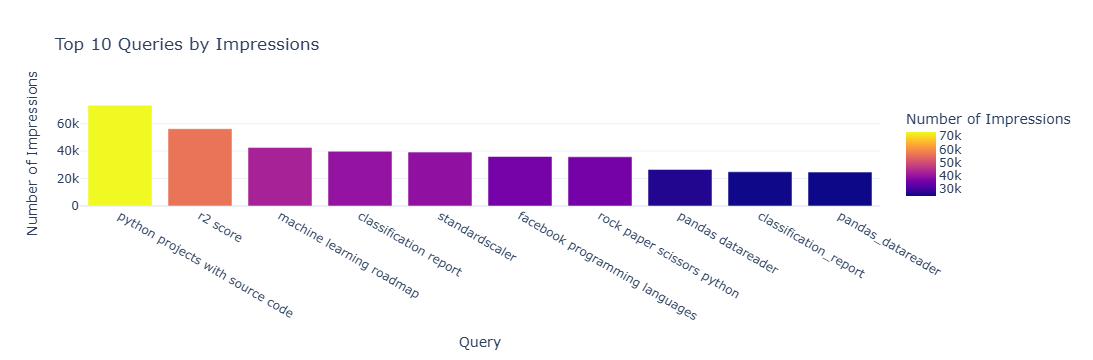

In [11]:
top_impressions = data.sort_values(by='Impressions', ascending=False).head(10)
fig_impressions = px.bar(top_impressions, x='Top queries', y='Impressions', 
                         title='Top 10 Queries by Impressions', 
                         labels={'Impressions':'Number of Impressions', 'Top queries':'Query'},
                         color='Impressions')
fig_impressions.show()

# Step 6: Analyze Queries with Highest and Lowest CTR

In [12]:
# Highest CTR
high_ctr = data.sort_values(by='CTR', ascending=False).head(10)
print(high_ctr[['Top queries', 'CTR']])

                                           Top queries     CTR
928                           the cleverprogrammer.com  0.8548
927                          the clever programmer.com  0.8281
1                                  thecleverprogrammer  0.8128
732               the clever programmer python project  0.7857
307    the clever programmer machine learning projects  0.7735
4                                the clever programmer  0.7638
964               python program to send otp to mobile  0.7083
95                        the card game code in python  0.6699
771  write a python program that calculates number ...  0.6632
137  python program to calculate number of seconds ...  0.6585


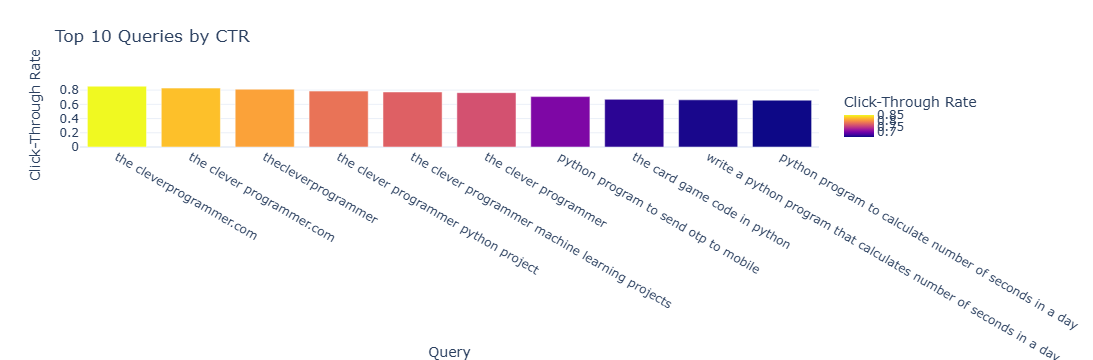

In [13]:
top_ctr = data.sort_values(by='CTR', ascending=False).head(10)
fig_ctr = px.bar(top_ctr, x='Top queries', y='CTR', 
                 title='Top 10 Queries by CTR', 
                 labels={'CTR':'Click-Through Rate', 'Top queries':'Query'},
                 color='CTR')
fig_ctr.show()

In [14]:
# Lowest CTR
low_ctr = data.sort_values(by='CTR', ascending=True).head(10)
print(low_ctr[['Top queries', 'CTR']])

                        Top queries     CTR
929                   python turtle  0.0029
232                  standardscaler  0.0045
423   classification report sklearn  0.0047
544                 standard scaler  0.0048
981                r2 score sklearn  0.0062
82                         r2 score  0.0065
536              python source code  0.0067
684                 turtle graphics  0.0070
664  online payment fraud detection  0.0070
858          water quality analysis  0.0076


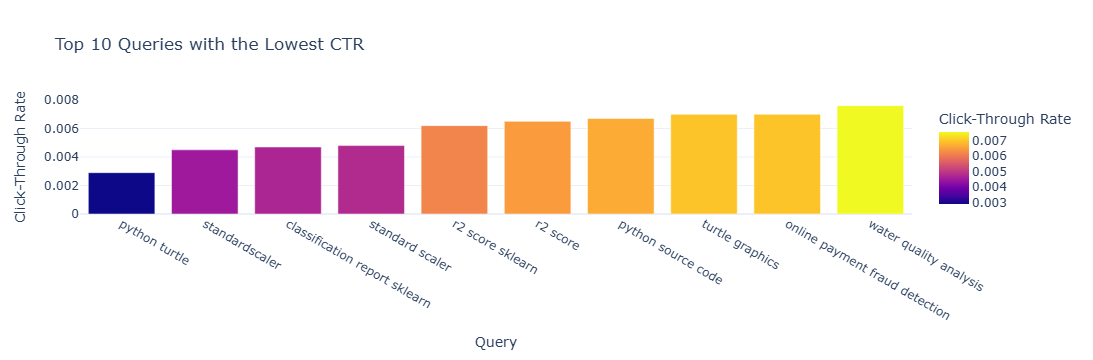

In [15]:
lowest_ctr = data.sort_values(by='CTR', ascending=True).head(10)
fig_lowest_ctr = px.bar(lowest_ctr, x='Top queries', y='CTR', 
                        title='Top 10 Queries with the Lowest CTR', 
                        labels={'CTR':'Click-Through Rate', 'Top queries':'Query'},
                        color='CTR')
fig_lowest_ctr.show()

# Step 7: Correlation Analysis

In [16]:
numeric_data = data.select_dtypes(include=[np.number])

In [17]:
# Compute Correlation Matrix
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

               Clicks  Impressions       CTR  Position
Clicks       1.000000     0.377256  0.106758 -0.111582
Impressions  0.377256     1.000000 -0.331126  0.357921
CTR          0.106758    -0.331126  1.000000 -0.728320
Position    -0.111582     0.357921 -0.728320  1.000000


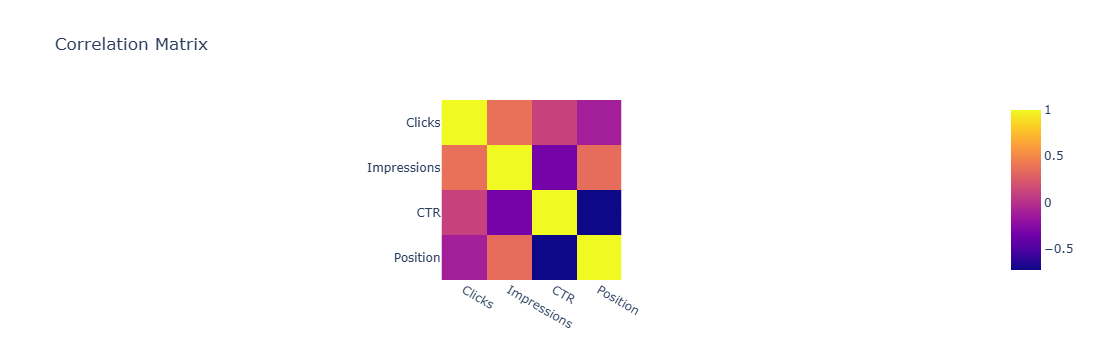

In [18]:
fig = px.imshow(correlation_matrix, title='Correlation Matrix')
fig.show()

# Step 8: Anomaly Detection

In [19]:
# Using Isolation Forest Algorithm
model = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
data['Anomaly'] = model.fit_predict(data[['Clicks', 'Impressions', 'CTR', 'Position']])

In [21]:
# Results of Anomaly Detection
anomalies = data[data['Anomaly'] == -1]
anomalies

,Top queries,Clicks,Impressions,CTR,Position,Cleaned_Words,Anomaly
0,number guessing game python,5223,14578,0.3583,1.61,"[number, guessing, game, python]",-1
1,thecleverprogrammer,2809,3456,0.8128,1.02,[thecleverprogrammer],-1
2,python projects with source code,2077,73380,0.0283,5.94,"[python, projects, with, source, code]",-1
3,classification report in machine learning,2012,4959,0.4057,1.28,"[classification, report, in, machine, learning]",-1
4,the clever programmer,1931,2528,0.7638,1.09,"[the, clever, programmer]",-1
5,standard scaler in machine learning,1559,7292,0.2138,1.53,"[standard, scaler, in, machine, learning]",-1
6,aman kharwal,1490,5752,0.2590,3.75,"[aman, kharwal]",-1
7,python turtle graphics code,1455,13585,0.1071,4.60,"[python, turtle, graphics, code]",-1
8,python game projects with source code,1421,4946,0.2873,2.23,"[python, game, projects, with, source, code]",-1
9,82 python projects with source code,1343,3562,0.3770,1.32,"[python, projects, with, source, code]",-1
